In [1]:
import scipy.io
predicted_data = scipy.io.loadmat('zPred.mat')
actual_data = scipy.io.loadmat('z.mat')
zPred = predicted_data['zPred'] 
z = actual_data['z'] 
print("Data loaded from .mat files.")

Data loaded from .mat files.


x position - MSE: 9.5641, MAE: 2.4940, R2: 0.5040
y position - MSE: 9.4877, MAE: 2.4627, R2: 0.5164
x velocity - MSE: 25.2274, MAE: 3.8675, R2: 0.5494
y velocity - MSE: 29.0042, MAE: 3.9885, R2: 0.5059


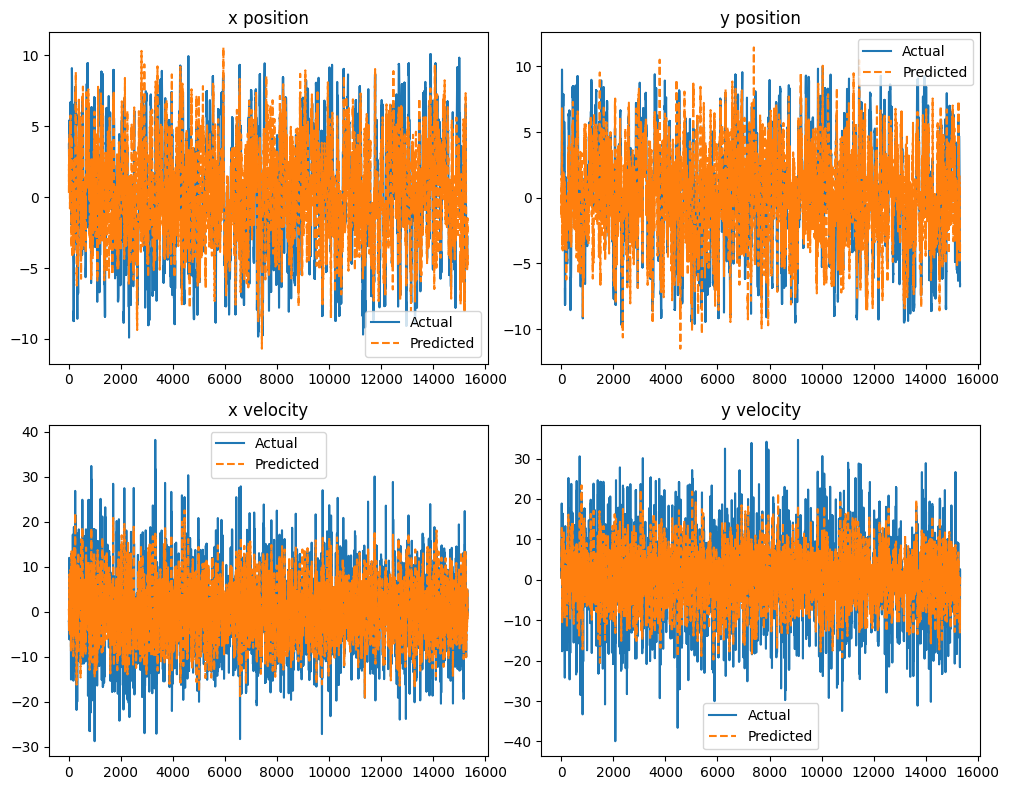

In [2]:
import numpy as np
import scipy.io
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
z_selected = z[:, :4]  
zPred_selected = zPred[:, :4]  

mse_list = []
mae_list = []
r2_list = []

for i in range(4):
    mse = mean_squared_error(z_selected[:, i], zPred_selected[:, i])
    mae = mean_absolute_error(z_selected[:, i], zPred_selected[:, i])
    r2 = r2_score(z_selected[:, i], zPred_selected[:, i])
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)
features = ['x position', 'y position', 'x velocity', 'y velocity']
for i, (mse, mae, r2) in enumerate(zip(mse_list, mae_list, r2_list)):
    print(f"{features[i]} - MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")
fig, axs = plt.subplots(2, 2, figsize=(10, 8)) 
for i, ax in enumerate(axs.flat):
    ax.plot(z_selected[:, i], label="Actual")
    ax.plot(zPred_selected[:, i], label="Predicted", linestyle='--')
    ax.set_title(features[i])
    ax.legend()

plt.tight_layout()
plt.show()
